In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Get the most recent precipitation date
most_recent_prcp_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_prcp_date

('2017-08-23')

In [11]:
twelve_mos_ago_prcp_date = dt.date(2017,8,23) - dt.timedelta(days=365)

In [12]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
one_year_ago_prcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > twelve_mos_ago_prcp_date).\
                        order_by(Measurement.date).all()
one_year_ago_prcp

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [13]:
# Save the query results as a Pandas DataFrame 
df = pd.DataFrame(one_year_ago_prcp, columns=['date', 'prcp'])
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [14]:
#Set the index to the date column
df.set_index(['date']).head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [15]:
# Sort the dataframe by date
df.sort_values(by='date', ascending=False).head()

,date,prcp
2222,2017-08-23,0.45
2221,2017-08-23,0.08
2220,2017-08-23,0.00
2219,2017-08-23,0.00
2218,2017-08-22,0.50


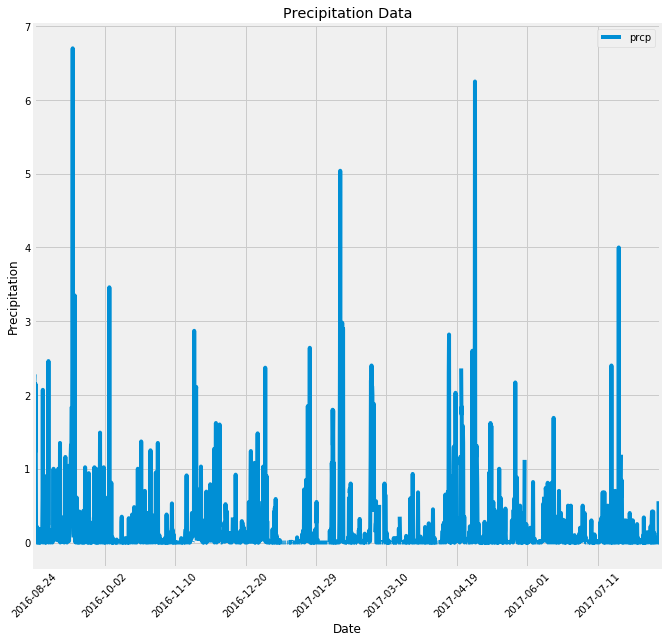

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date', 'prcp',figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Data')
plt.xticks(rotation=45)
plt.show()

![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
stations_available = session.query(Station.station).count()
stations_available

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowest_temp_recorded = session.query(Measurement.station,func.min(Measurement.tobs)).all()
lowest_temp_recorded 

[('USC00511918', 53.0)]

In [21]:
highest_temp_recorded = session.query(Measurement.station,func.max(Measurement.tobs)).all()
highest_temp_recorded 

[('USC00519397', 87.0)]

In [22]:
average_temp_recorded = session.query(Measurement.station,func.avg(Measurement.tobs)).all()
average_temp_recorded 

[('USC00519397', 73.09795396419437)]

In [38]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_recent_date_tobs_record = session.query (Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()
most_recent_date_tobs_record

('2017-08-18')

In [39]:
twelve_mos_ago_tobs_date = dt.date(2017,8,18) - dt.timedelta(days=365)
twelve_mos_ago_tobs_date 

datetime.date(2016, 8, 18)

In [40]:
one_year_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > twelve_mos_ago_tobs_date ).order_by(Measurement.date).all()
one_year_tobs

[('2016-08-19', 77.0),
 ('2016-08-19', 77.0),
 ('2016-08-19', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-19', 79.0),
 ('2016-08-19', 73.0),
 ('2016-08-20', 80.0),
 ('2016-08-20', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-20', 81.0),
 ('2016-08-20', 81.0),
 ('2016-08-20', 76.0),
 ('2016-08-21', 76.0),
 ('2016-08-21', 76.0),
 ('2016-08-21', 80.0),
 ('2016-08-21', 79.0),
 ('2016-08-21', 74.0),
 ('2016-08-22', 77.0),
 ('2016-08-22', 76.0),
 ('2016-08-22', 79.0),
 ('2016-08-22', 79.0),
 ('2016-08-22', 80.0),
 ('2016-08-22', 78.0),
 ('2016-08-22', 72.0),
 ('2016-08-23', 81.0),
 ('2016-08-23', 76.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 77.0),
 ('2016-08-23', 74.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 76.0),
 ('2016-08-24', 80.0),
 ('2016-08-24', 78.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 77.0),
 ('2016-08-24', 74.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 80.0),
 ('2016-08-

In [55]:
dataframe = pd.DataFrame(one_year_tobs, columns=['Date','Temperature Observations'])
dataframe.head()

,Date,Temperature Observations
0,2016-08-19,77.0
1,2016-08-19,77.0
2,2016-08-19,80.0
3,2016-08-19,79.0
4,2016-08-19,79.0


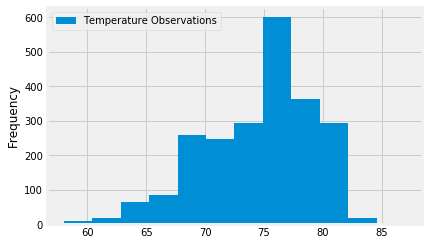

In [68]:
dataframe.plot.hist(one_year_tobs,bins)
bins = 12

![precipitation](Images/station-histogram.png)

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-08-18', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [57]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2016, 8, 18'))

[(53.0, 73.16381492355978, 86.0)]


Text(0, 0.5, 'Temperature(fahrenheit)')

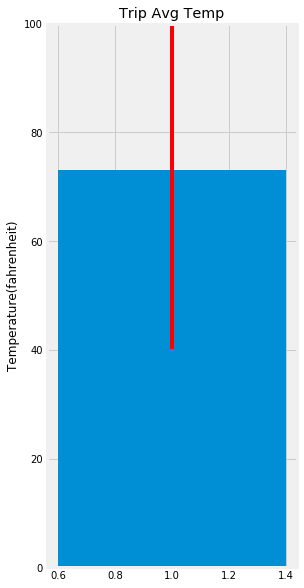

In [65]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(4,10))
plt.bar(1,73.16381492355978)
plt.errorbar(1,73.16381492355978, yerr=(86.0 - 53.0), color = 'r')
plt.ylim(0, 100)
plt.title('Trip Avg Temp')
plt.ylabel('Temperature(fahrenheit)')

In [70]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#Reference Stephanie Walters assistance
def total_rainfall_amount(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(Measurement.station, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).\
            group_by(Measurement.station).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
            filter(Station.station == Measurement.station).all()

trip_rain = total_rainfall_amount('2017-02-28', '2017-03-05')
trip_rain

trip_rain_dataframe = pd.DataFrame(trip_rain, columns=['Station', 'Latitude', 'Longitude', 'Elevation', 'Percipitation'])

trip_rain_dataframe.sort_values(by='Percipitation',ascending=False)
trip_rain_dataframe


,Station,Latitude,Longitude,Elevation,Percipitation
0,USC00513117,21.42340,-157.80150,14.6,0.16
1,USC00514830,21.52130,-157.83740,7.0,0.04
2,USC00516128,21.33310,-157.80250,152.4,0.58
3,USC00517948,21.39340,-157.97510,11.9,NaN
4,USC00519281,21.45167,-157.84889,32.9,0.04
5,USC00519397,21.27160,-157.81680,3.0,0.00
6,USC00519523,21.33556,-157.71139,19.5,0.00


## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [31]:
# Plot the daily normals as an area plot with `stacked=False`
